# K-Nearest classification, K-Nearest regression and K-Means clustering

In [1818]:
import pandas as pd
import os
import sys
from os import listdir

# Data files are available in the "../data/" directory
# For example, running this will list all files under the data directory

cur_dir = os.path.abspath('')
data_dir = "%s\\data" % cur_dir

for file_name in os.listdir(data_dir):
    print(file_name)

financial-data-credit-analysis.csv
iris-flowers.csv
second-hand-used-cars.csv


## Supervised Machine Learning Algorithms

### K-Nearest classification:
The task is to create classification model to determine the exact species of the iris flowers based on the given parameters

In [1819]:
iris_flowers_filename = "iris-flowers.csv"
iris_flowers = pd.read_csv("%s\%s" % (data_dir, iris_flowers_filename))

In [1820]:
iris_flowers.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


* **<ins>Validate the data and leave only essential fields</ins>**

In [1821]:
iris_flowers = iris_flowers.drop(['Id'], axis=1)

In [1822]:
iris_flowers.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

* **<ins>Split data to train DataFrame and test Series:</ins>**

In [1823]:
from sklearn.model_selection import train_test_split

In [1824]:
#target
y = iris_flowers['Species']
#features:
X = iris_flowers.drop(['Species'], axis=1)

In [1825]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* **<ins>Validate correct spliting:</ins>**

In [1826]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0] 
assert X_train.shape[1] == X_test.shape[1] 

(105, 4)
(105,)
(45, 4)
(45,)


* **<ins>Train model:</ins>**

In [1827]:
from sklearn.neighbors import KNeighborsClassifier

In [1828]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

* **<ins>Get prediction:</ins>**

In [1829]:
predictions = model.predict(X_test)

* **<ins>Validate model's prediction (accuracy_score, confusion_matrix):</ins>**

In [1830]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [1831]:
# K1 accuracy 91-100%
# K3 accuracy 86-97%
# K3 accuracy 91-100%
accuracy_score(y_test, predictions)

0.9777777777777777

In [1832]:
confusion_matrix(y_test, predictions)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 13]], dtype=int64)

### K-Nearest regression:
The task is to create model to used car price based on the given parameters

In [1833]:
second_hand_used_cars_filename = "second-hand-used-cars.csv"
second_hand_used_cars = pd.read_csv("%s\%s" % (data_dir, second_hand_used_cars_filename))

In [1834]:
second_hand_used_cars.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


* **<ins>Validate the data, find the corelation and leave only essential fields:</ins>**

In [1835]:
second_hand_used_cars.isnull().any()

v.id             False
on road old      False
on road now      False
years            False
km               False
rating           False
condition        False
economy          False
top speed        False
hp               False
torque           False
current price    False
dtype: bool

In [1836]:
second_hand_used_cars.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [1837]:
second_hand_used_cars.drop('v.id', axis=1, inplace=True)

* **<ins>Split data to train DataFrame and test Series:</ins>**

In [1838]:
#target:
y = second_hand_used_cars['current price']
#features:
X = second_hand_used_cars.drop(['current price'], axis=1)

In [1839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

* **<ins>Validate correct spliting:</ins>**

In [1840]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0] 
assert X_train.shape[1] == X_test.shape[1] 

(700, 10)
(700,)
(300, 10)
(300,)


* **<ins>Train model:</ins>**

In [1841]:
from sklearn.neighbors import KNeighborsRegressor

In [1842]:
# Change n_neighbors value here and validate the MAE (below) 
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

* **<ins>Get prediction:</ins>**

In [1843]:
predictions = model.predict(X_test)

* **<ins>Validate model's prediction (MAE):</ins>**

In [1844]:
from sklearn.metrics import mean_absolute_error

In [1845]:
# MAE (mean absolute error) has to be as less as posible
# n_neighbors=1 -----> MAE == 26962.536666666667
# n_neighbors=2 -----> MAE == 26962.536666666667
# n_neighbors=3 -----> MAE == 21688.485555555555
mean_absolute_error(y_test, predictions)

21679.957222222223

## Unsupervised Machine Learning Algorithm

### K- Means Clustering
Problem Statement:
1. Create a model to find customers with similar credit patterns.
2. Find major clusters and unusual clusters, small clusters - analyze the customer information in those clusters

In [1846]:
credit_analysis_data = "financial-data-credit-analysis.csv"
credit_analysis_data = pd.read_csv("%s\%s" % (data_dir, credit_analysis_data))

In [1847]:
credit_analysis_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


* **<ins>Clean data</ins>**

In [1848]:
credit_analysis_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [1849]:
raw_shape = credit_analysis_data.shape
raw_shape

(8950, 18)

In [1850]:
credit_analysis_data = credit_analysis_data.dropna()

In [1851]:
credit_analysis_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [1852]:
credit_analysis_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [1853]:
credit_analysis_data['CUST_ID'] = credit_analysis_data['CUST_ID'].str.replace("C", "")

In [1854]:
credit_analysis_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [1855]:
credit_analysis_data['CUST_ID'] = pd.to_numeric(credit_analysis_data['CUST_ID'])
credit_analysis_data.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

* **<ins>Prepafe heplers funcions:</ins>**

In [1856]:
def get_min_values(df):
    min_values = {}
    for (column_name, column_data) in df.iteritems():
        min_values[column_name] = column_data.min()
    print(min_values)
    return min_values

In [1857]:
def how_many_rows_have_been_deleted(df):
    clean_shape = df.shape
    clean_shape
    row_removed_percent = 100 - (clean_shape[0]/raw_shape[0]) * 100
    print(str(round(row_removed_percent, 2)) + "% rows have been removed")

In [1858]:
def remove_zero_value(df):
    for (column_name, column_data) in df.iteritems():
        if not column_data.min() > 0:
            df = df[df[column_name] != column_data.min()]
    get_min_values(df)
    return df

* **<ins>Separate DFs to general, frequency, payments and transactions DataFrames</ins>**

In [1859]:
general_data = credit_analysis_data[['CUST_ID', 'TENURE', 'CREDIT_LIMIT', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']]

In [1860]:
general_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,10001,12,1000.0,40.900749,95.40,0.00,95.40,0.000000
1,10002,12,7000.0,3202.467416,0.00,0.00,0.00,6442.945483
2,10003,12,7500.0,2495.148862,773.17,773.17,0.00,0.000000
4,10005,12,1200.0,817.714335,16.00,16.00,0.00,0.000000
5,10006,12,1800.0,1809.828751,1333.28,0.00,1333.28,0.000000


In [1861]:
frequency_data = credit_analysis_data[['CUST_ID', 'TENURE', 'CREDIT_LIMIT', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]

In [1862]:
frequency_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,10001,12,1000.0,0.818182,0.166667,0.000000,0.083333,0.00
1,10002,12,7000.0,0.909091,0.000000,0.000000,0.000000,0.25
2,10003,12,7500.0,1.000000,1.000000,1.000000,0.000000,0.00
4,10005,12,1200.0,1.000000,0.083333,0.083333,0.000000,0.00
5,10006,12,1800.0,1.000000,0.666667,0.000000,0.583333,0.00


In [1863]:
payments_data = credit_analysis_data[['CUST_ID', 'TENURE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

In [1864]:
payments_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,10001,12,1000.0,201.802084,139.509787,0.000000
1,10002,12,7000.0,4103.032597,1072.340217,0.222222
2,10003,12,7500.0,622.066742,627.284787,0.000000
4,10005,12,1200.0,678.334763,244.791237,0.000000
5,10006,12,1800.0,1400.057770,2407.246035,0.000000


In [1865]:
transactions_data = credit_analysis_data[['CUST_ID', 'TENURE', 'CREDIT_LIMIT', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']]

In [1866]:
transactions_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,CASH_ADVANCE_TRX,PURCHASES_TRX
0,10001,12,1000.0,0,2
1,10002,12,7000.0,4,0
2,10003,12,7500.0,0,12
4,10005,12,1200.0,0,1
5,10006,12,1800.0,0,8


1. **<ins>Determinete an optimal number of clusters for general_data:</ins>**

In [1874]:
from sklearn.cluster import KMeans

In [1875]:
## we are applying K-means and trying to find the cost 
## (intra cluster distance, sum of distance of point to the center of its respective cluster)
cost = []
n_cluster = []
for k in range (1, 11):
    # Create a k-means model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    kmeans_model.fit(general_data[['TENURE', 'CREDIT_LIMIT', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])

    # These are our fitted labels for clusters -- the first cluster has label 0, the second has label 1, etc.
    
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
    cost.append(interia)
    n_cluster.append(k)

k: 1  cost: 264720041423.22363
k: 2  cost: 168052843635.73425
k: 3  cost: 139230121587.454
k: 4  cost: 114640131744.35721
k: 5  cost: 98301348377.58394
k: 6  cost: 88099770963.65654
k: 7  cost: 78916236220.48291
k: 8  cost: 71798917273.07622
k: 9  cost: 67177299304.144035
k: 10  cost: 62623917966.0954


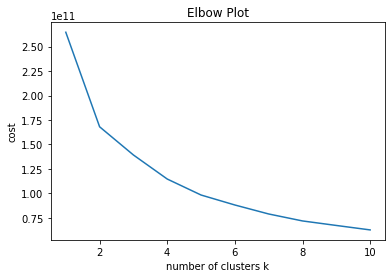

In [1876]:
import matplotlib.pyplot as plt
%matplotlib inline

  
# plotting the points 
plt.plot(n_cluster, cost)
  
# naming the x axis
plt.xlabel('number of clusters k')
# naming the y axis
plt.ylabel('cost')
  
# giving a title to my graph
plt.title('Elbow Plot')
  
# function to show the plot
plt.show()

* **<ins>Train model:<ins>**

In [1877]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
kmeans_model.fit(general_data)
# Selected K = 2 as optimum value of k or number of clusters
labels = kmeans_model.labels_

In [1878]:
labels

array([0, 3, 0, ..., 1, 1, 1])

* **<ins>Analyse the clusters:<ins>**

In [1879]:
labels_df = pd.DataFrame(labels)

In [1880]:
labels_df.columns = ['cluster_id']
labels_df.head(3)

,cluster_id
0,0
1,3
2,0


In [1881]:
general_data = general_data.reset_index()
general_data.drop('index',axis =1,inplace = True)

In [1882]:
general_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,10001,12,1000.0,40.900749,95.40,0.00,95.40,0.000000
1,10002,12,7000.0,3202.467416,0.00,0.00,0.00,6442.945483
2,10003,12,7500.0,2495.148862,773.17,773.17,0.00,0.000000
3,10005,12,1200.0,817.714335,16.00,16.00,0.00,0.000000
4,10006,12,1800.0,1809.828751,1333.28,0.00,1333.28,0.000000


In [1883]:
general_data = pd.concat([general_data, labels_df],axis =1)

In [1884]:
general_data.head()

,CUST_ID,TENURE,CREDIT_LIMIT,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,cluster_id
0,10001,12,1000.0,40.900749,95.40,0.00,95.40,0.000000,0
1,10002,12,7000.0,3202.467416,0.00,0.00,0.00,6442.945483,3
2,10003,12,7500.0,2495.148862,773.17,773.17,0.00,0.000000,0
3,10005,12,1200.0,817.714335,16.00,16.00,0.00,0.000000,0
4,10006,12,1800.0,1809.828751,1333.28,0.00,1333.28,0.000000,0


In [1885]:
import seaborn as sns

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='CASH_ADVANCE'>

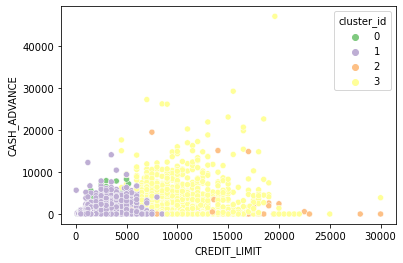

In [1886]:
sns.scatterplot(data=general_data, x="CREDIT_LIMIT", y="CASH_ADVANCE", hue="cluster_id", palette='Accent')

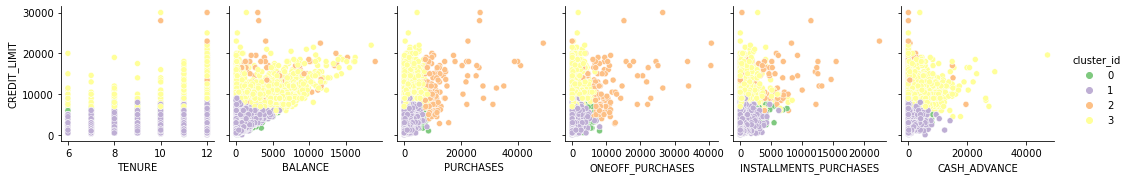

In [1888]:
sns.pairplot(
    general_data, hue="cluster_id", 
    palette='Accent', 
#     markers=["o", "P", "s", 'H'], 
    y_vars=['CREDIT_LIMIT'],
    x_vars=['TENURE', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']
)